# Time series clustering exercise

# Data

## WARNING: Only run this command if you do not have the data, it takes a long time!

In [23]:
#the cell needs to be run only once
!for ((y=93; y<=99; y+=1)); do wget \
ftp://ftp.census.gov/Econ2001_And_Earlier/CBP_CSV/zbp$y\totals.zip; done

!for ((y=0; y<=1; y+=1)); do wget \
ftp://ftp.census.gov/Econ2001_And_Earlier/CBP_CSV/zbp0$y\totals.zip; done

!for ((y=2; y<=9; y+=1)); do wget \
ftp://ftp.census.gov/econ200$y\/CBP_CSV/zbp0$y\totals.zip; done

!for ((y=10; y<=14; y+=1)); do wget \
ftp://ftp.census.gov/econ20$y\/CBP_CSV/zbp$y\totals.zip; done



--2017-12-11 10:44:15--  ftp://ftp.census.gov/Econ2001_And_Earlier/CBP_CSV/zbp93totals.zip
           => “zbp93totals.zip”
Resolving ftp.census.gov... 148.129.75.35, 2610:20:2010:a09:1000:0:9481:4b23
Connecting to ftp.census.gov|148.129.75.35|:21... connected.
Logging in as anonymous ... Logged in!
==> SYST ... done.    ==> PWD ... done.
==> TYPE I ... done.  ==> CWD (1) /Econ2001_And_Earlier/CBP_CSV ... done.
==> SIZE zbp93totals.zip ... done.
==> PASV ... done.    ==> RETR zbp93totals.zip ... 
No such file “zbp93totals.zip”.

--2017-12-11 10:44:16--  ftp://ftp.census.gov/Econ2001_And_Earlier/CBP_CSV/zbp94totals.zip
           => “zbp94totals.zip.1”
Resolving ftp.census.gov... 148.129.75.35, 2610:20:2010:a09:1000:0:9481:4b23
Connecting to ftp.census.gov|148.129.75.35|:21... connected.
Logging in as anonymous ... 
Error in server response, closing control connection.
Retrying.

--2017-12-11 10:49:20--  ftp://ftp.census.gov/Econ2001_And_Earlier/CBP_CSV/zbp94totals.zip
  (try: 2) => “zbp

==> PASV ... done.    ==> RETR zbp00totals.zip ... done.
Length: 628434 (614K) (unauthoritative)

100%[======================================>] 628,434     2.07M/s   in 0.3s    

2017-12-11 11:40:20 (2.07 MB/s) - “zbp00totals.zip.1” saved [628434]

--2017-12-11 11:40:20--  ftp://ftp.census.gov/Econ2001_And_Earlier/CBP_CSV/zbp01totals.zip
           => “zbp01totals.zip”
Resolving ftp.census.gov... 148.129.75.35, 2610:20:2010:a09:1000:0:9481:4b23
Connecting to ftp.census.gov|148.129.75.35|:21... connected.
Logging in as anonymous ... 
Error in server response, closing control connection.
Retrying.

--2017-12-11 11:45:21--  ftp://ftp.census.gov/Econ2001_And_Earlier/CBP_CSV/zbp01totals.zip
  (try: 2) => “zbp01totals.zip”
Connecting to ftp.census.gov|148.129.75.35|:21... connected.
Logging in as anonymous ... 
Error in server response, closing control connection.
Retrying.

--2017-12-11 11:50:25--  ftp://ftp.census.gov/Econ2001_And_Earlier/CBP_CSV/zbp01totals.zip
  (try: 3) => “zbp01totals.

Logging in as anonymous ... 
Error in server response, closing control connection.
Retrying.

--2017-12-11 12:56:25--  ftp://ftp.census.gov/econ2007/CBP_CSV/zbp07totals.zip
  (try: 3) => “zbp07totals.zip”
Connecting to ftp.census.gov|148.129.75.35|:21... connected.
Logging in as anonymous ... Logged in!
==> SYST ... done.    ==> PWD ... done.
==> TYPE I ... done.  ==> CWD (1) /econ2007/CBP_CSV ... done.
==> SIZE zbp07totals.zip ... 667754
==> PASV ... done.    ==> RETR zbp07totals.zip ... done.
Length: 667754 (652K) (unauthoritative)

100%[======================================>] 667,754      509K/s   in 1.3s    

2017-12-11 12:56:26 (509 KB/s) - “zbp07totals.zip” saved [667754]

--2017-12-11 12:56:26--  ftp://ftp.census.gov/econ2008/CBP_CSV/zbp08totals.zip
           => “zbp08totals.zip”
Resolving ftp.census.gov... 148.129.75.35, 2610:20:2010:a09:1000:0:9481:4b23
Connecting to ftp.census.gov|148.129.75.35|:21... connected.
Logging in as anonymous ... 
Error in server response, closing

## After downloading the data we import the necessary packages


In [1]:
import os
import geopandas as gp
import urllib
import zipfile
import requests
import json
import pandas as pd
import io
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist, pdist
from sklearn import mixture


%pylab inline

Populating the interactive namespace from numpy and matplotlib


# In this and the next command we convert all the data in dataframes

In [2]:
zf1 = zipfile.ZipFile("zbp94totals.zip")
zf2 = zipfile.ZipFile("zbp95totals.zip")
zf3 = zipfile.ZipFile("zbp96totals.zip")
zf4 = zipfile.ZipFile("zbp97totals.zip")
zf5 = zipfile.ZipFile("zbp98totals.zip")
zf6 = zipfile.ZipFile("zbp99totals.zip")
zf7 = zipfile.ZipFile("zbp00totals.zip")
zf8 = zipfile.ZipFile("zbp01totals.zip")
zf9 = zipfile.ZipFile("zbp02totals.zip")
zf10 = zipfile.ZipFile("zbp03totals.zip")
zf11 = zipfile.ZipFile("zbp04totals.zip")
zf12 = zipfile.ZipFile("zbp05totals.zip")
zf13 = zipfile.ZipFile("zbp06totals.zip")
zf14 = zipfile.ZipFile("zbp07totals.zip")
zf15 = zipfile.ZipFile("zbp08totals.zip")
zf16 = zipfile.ZipFile("zbp09totals.zip")
zf17 = zipfile.ZipFile("zbp10totals.zip")
zf18 = zipfile.ZipFile("zbp11totals.zip")
zf19 = zipfile.ZipFile("zbp12totals.zip")
zf20 = zipfile.ZipFile("zbp13totals.zip")
zf21 = zipfile.ZipFile("zbp14totals.zip")



In [3]:
df1 = pd.read_csv(zf1.open("zbp94totals.zip".replace('.zip','.txt')))
df2 = pd.read_csv(zf2.open("zbp95totals.zip".replace('.zip','.txt')))
df3 = pd.read_csv(zf3.open("zbp96totals.zip".replace('.zip','.txt')))
df4 = pd.read_csv(zf4.open("zbp97totals.zip".replace('.zip','.txt')))
df5 = pd.read_csv(zf5.open("zbp98totals.zip".replace('.zip','.txt')))
df6 = pd.read_csv(zf6.open("zbp99totals.zip".replace('.zip','.txt')))
df7 = pd.read_csv(zf7.open("zbp00totals.zip".replace('.zip','.txt')))
df8 = pd.read_csv(zf8.open("zbp01totals.zip".replace('.zip','.txt')))
df9 = pd.read_csv(zf9.open("zbp02totals.zip".replace('.zip','.txt')))
df10 = pd.read_csv(zf10.open("zbp03totals.zip".replace('.zip','.txt')))
df11 = pd.read_csv(zf11.open("zbp04totals.zip".replace('.zip','.txt')))
df12 = pd.read_csv(zf12.open("zbp05totals.zip".replace('.zip','.txt')))
df13 = pd.read_csv(zf13.open("zbp06totals.zip".replace('.zip','.txt')))
df14 = pd.read_csv(zf14.open("zbp07totals.zip".replace('.zip','.txt')))
df15 = pd.read_csv(zf15.open("zbp08totals.zip".replace('.zip','.txt')))
df16 = pd.read_csv(zf16.open("zbp09totals.zip".replace('.zip','.txt')))
df17 = pd.read_csv(zf17.open("zbp10totals.zip".replace('.zip','.txt')))
df18 = pd.read_csv(zf18.open("zbp11totals.zip".replace('.zip','.txt')))
df19 = pd.read_csv(zf19.open("zbp12totals.zip".replace('.zip','.txt')))
df20 = pd.read_csv(zf20.open("zbp13totals.zip".replace('.zip','.txt')))
df21 = pd.read_csv(zf21.open("zbp14totals.zip".replace('.zip','.txt')))

# Here we check the shape of the datashapes, and their "head" to understand how they are

In [4]:
df1.shape

(39259, 7)

In [5]:
df2.shape

(39932, 7)

In [6]:
df1.head()

,zip,name,empflag,emp,qp1,ap,est
0,1001,"Agawam, MA",NaN,6198,33601,155158,439
1,1002,"Amherst, MA",NaN,6073,28924,127367,450
2,1003,"Amherst, MA",NaN,68,367,1604,10
3,1004,"Amherst, MA",NaN,210,844,4302,47
4,1005,"Barre, MA",NaN,678,3010,13521,92


# In the following commands we download the zipcode shapefile and read it

In [7]:
PUIdata = os.getenv("PUIDATA")
"The path to the PUIdata directory is " + PUIdata

'The path to the PUIdata directory is /home/cusp/jss895/PUIdata'

In [8]:
urllib.urlretrieve("https://data.cityofnewyork.us/download/i8iw-xf4u/application%2Fzip",PUIdata+"/ZipCode.gz")

('/home/cusp/jss895/PUIdata/ZipCode.gz',
 <httplib.HTTPMessage instance at 0x7f1c31c67d40>)

In [9]:
zip_ref = zipfile.ZipFile(PUIdata+"/ZipCode.gz", 'r')
zip_ref.extractall(PUIdata)
zip_ref.close()

In [10]:
import glob
zipcodefile = glob.glob(PUIdata+"/ZIP_CODE_040114*.shp") #this creates a LIST object with the name of the shape files in my directory
                                           #(I only have one)
print zipcodefile
zipcodes = gp.GeoDataFrame.from_file(zipcodefile[0])

['/home/cusp/jss895/PUIdata/ZIP_CODE_040114.shp']


In [11]:
zipcodes.head()

,ZIPCODE,BLDGZIP,PO_NAME,POPULATION,AREA,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,SHAPE_AREA,SHAPE_LEN,geometry
0,11436,0,Jamaica,18681.0,2.269930e+07,NY,Queens,36,081,http://www.usps.com/,0.0,0.0,"POLYGON ((1038098.251871482 188138.3800067157,..."
1,11213,0,Brooklyn,62426.0,2.963100e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1001613.712964058 186926.4395172149,..."
2,11212,0,Brooklyn,83866.0,4.197210e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1011174.275535807 183696.33770971, 1..."
3,11225,0,Brooklyn,56527.0,2.369863e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((995908.3654508889 183617.6128015518,..."
4,11218,0,Brooklyn,72280.0,3.686880e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((991997.1134308875 176307.4958601296,..."


# Next we create a column that makes reference to the number of establishments in a given year

In [12]:
df1["1994"] = df1.est 
df2["1995"] = df2.est 
df3["1996"] = df3.est 
df4["1997"] = df4.est 
df5["1998"] = df5.EST 
df6["1999"] = df6.EST 
df7["2000"] = df7.EST 
df8["2001"] = df8.EST 
df9["2002"] = df9.EST 
df10["2003"] = df10.est 
df11["2004"] = df11.est 
df12["2005"] = df12.est 
df13["2006"] = df13.est 
df14["2007"] = df14.est 
df15["2008"] = df15.est 
df16["2009"] = df16.est 
df17["2010"] = df17.est
df18["2011"] = df18.est 
df19["2012"] = df19.est 
df20["2013"] = df20.est 
df21["2014"] = df21.est 


# Here we leave only the variables we are interested in for each dataframe

In [13]:
df1 = df1[["zip", "1994"]]
df2 = df2[["zip", "1995"]]
df3 = df3[["zip", "1996"]]
df4 = df4[["zip", "1997"]]
df5 = df5[["ZIP", "1998"]]
df6 = df6[["ZIP", "1999"]]
df7 = df7[["ZIP", "2000"]]
df8 = df8[["ZIP", "2001"]]
df9 = df9[["ZIP", "2002"]]
df10 = df10[["zip", "2003"]]
df11 = df11[["zip", "2004"]]
df12 = df12[["zip", "2005"]]
df13 = df13[["zip", "2006"]]
df14 = df14[["zip", "2007"]]
df15 = df15[["zip", "2008"]]
df16 = df16[["zip", "2009"]]
df17 = df17[["zip", "2010"]]
df18 = df18[["zip", "2011"]]
df19 = df19[["zip", "2012"]]
df20 = df20[["zip", "2013"]]
df21 = df21[["zip", "2014"]]


In [14]:
df6.head()

,ZIP,1999
0,501,2
1,1001,469
2,1002,558
3,1003,13
4,1004,35


# Now we have to make sure we are capable of merging the datasets with the Zip Code shapefile, so we get the same type of variables and then merge.

In [15]:
type(df1.zip[3351])

numpy.int64

In [16]:
type(zipcodes.ZIPCODE[3])

unicode

In [17]:
zipcodes.ZIPCODE=zipcodes.ZIPCODE.apply(int)

In [18]:
zipcodes.head()

,ZIPCODE,BLDGZIP,PO_NAME,POPULATION,AREA,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,SHAPE_AREA,SHAPE_LEN,geometry
0,11436,0,Jamaica,18681.0,2.269930e+07,NY,Queens,36,081,http://www.usps.com/,0.0,0.0,"POLYGON ((1038098.251871482 188138.3800067157,..."
1,11213,0,Brooklyn,62426.0,2.963100e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1001613.712964058 186926.4395172149,..."
2,11212,0,Brooklyn,83866.0,4.197210e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1011174.275535807 183696.33770971, 1..."
3,11225,0,Brooklyn,56527.0,2.369863e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((995908.3654508889 183617.6128015518,..."
4,11218,0,Brooklyn,72280.0,3.686880e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((991997.1134308875 176307.4958601296,..."


In [19]:
zipcodes.shape

(263, 13)

# Here we merge the data into just one dataframe

In [20]:
df = pd.merge(zipcodes, df1, right_on="zip", left_on="ZIPCODE")

In [21]:
df = pd.merge(df, df2, right_on="zip", left_on="ZIPCODE")

In [22]:
df = pd.merge(df, df3, right_on="zip", left_on="ZIPCODE")

In [23]:
df = pd.merge(df, df4, right_on="zip", left_on="ZIPCODE")

In [24]:
df = pd.merge(df, df5, right_on="ZIP", left_on="ZIPCODE")

In [25]:
df = pd.merge(df, df6, right_on="ZIP", left_on="ZIPCODE")

In [26]:
df = pd.merge(df, df7, right_on="ZIP", left_on="ZIPCODE")

In [27]:
df = pd.merge(df, df8, right_on="ZIP", left_on="ZIPCODE")

In [28]:
df = pd.merge(df, df9, right_on="ZIP", left_on="ZIPCODE")

In [29]:
df = pd.merge(df, df10, right_on="zip", left_on="ZIPCODE")

In [30]:
df = pd.merge(df, df11, right_on="zip", left_on="ZIPCODE")

In [31]:
df = pd.merge(df, df12, right_on="zip", left_on="ZIPCODE")

In [32]:
df = pd.merge(df, df13, right_on="zip", left_on="ZIPCODE")

In [33]:
df = pd.merge(df, df14, right_on="zip", left_on="ZIPCODE")

In [34]:
df = pd.merge(df, df15, right_on="zip", left_on="ZIPCODE")

In [35]:
df = pd.merge(df, df16, right_on="zip", left_on="ZIPCODE")

In [36]:
df = pd.merge(df, df17, right_on="zip", left_on="ZIPCODE")

In [37]:
df = pd.merge(df, df18, right_on="zip", left_on="ZIPCODE")

In [38]:
df = pd.merge(df, df19, right_on="zip", left_on="ZIPCODE")

In [39]:
df = pd.merge(df, df20, right_on="zip", left_on="ZIPCODE")

In [40]:
df = pd.merge(df, df21, right_on="zip", left_on="ZIPCODE")

In [41]:
df.head()

,ZIPCODE,BLDGZIP,PO_NAME,POPULATION,AREA,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,...,zip_y,2010,zip_x,2011,zip_y,2012,zip_x,2013,zip_y,2014
0,11436,0,Jamaica,18681.0,2.269930e+07,NY,Queens,36,081,http://www.usps.com/,...,11436,98,11436,101,11436,95,11436,99,11436,109
1,11213,0,Brooklyn,62426.0,2.963100e+07,NY,Kings,36,047,http://www.usps.com/,...,11213,675,11213,674,11213,726,11213,755,11213,772
2,11212,0,Brooklyn,83866.0,4.197210e+07,NY,Kings,36,047,http://www.usps.com/,...,11212,699,11212,713,11212,721,11212,731,11212,752
3,11225,0,Brooklyn,56527.0,2.369863e+07,NY,Kings,36,047,http://www.usps.com/,...,11225,580,11225,597,11225,623,11225,673,11225,696
4,11218,0,Brooklyn,72280.0,3.686880e+07,NY,Kings,36,047,http://www.usps.com/,...,11218,1474,11218,1523,11218,1605,11218,1687,11218,1736


In [42]:
df.shape

(243, 55)

In [43]:
df.columns

Index([   u'ZIPCODE',    u'BLDGZIP',    u'PO_NAME', u'POPULATION',
             u'AREA',      u'STATE',     u'COUNTY',    u'ST_FIPS',
         u'CTY_FIPS',        u'URL', u'SHAPE_AREA',  u'SHAPE_LEN',
         u'geometry',      u'zip_x',       u'1994',      u'zip_y',
             u'1995',      u'zip_x',       u'1996',      u'zip_y',
             u'1997',      u'ZIP_x',       u'1998',      u'ZIP_y',
             u'1999',      u'ZIP_x',       u'2000',      u'ZIP_y',
             u'2001',        u'ZIP',       u'2002',      u'zip_x',
             u'2003',      u'zip_y',       u'2004',      u'zip_x',
             u'2005',      u'zip_y',       u'2006',      u'zip_x',
             u'2007',      u'zip_y',       u'2008',      u'zip_x',
             u'2009',      u'zip_y',       u'2010',      u'zip_x',
             u'2011',      u'zip_y',       u'2012',      u'zip_x',
             u'2013',      u'zip_y',       u'2014'],
      dtype='object')

# We create a data frame that contains only the variables we are interested in, as what we want is a time series

In [44]:
data = df[["1994", "1995", "1996", "1997", "1998", "1999", "2000", "2001", "2002", "2003", "2004", "2005", "2006", "2007", "2008", "2009", "2010", "2011", "2012", "2013", "2014"]]




In [45]:
data.head()

,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
0,51,50,53,51,51,58,65,57,78,74,...,82,80,84,90,92,98,101,95,99,109
1,406,420,433,456,476,473,477,493,546,569,...,556,565,556,592,621,675,674,726,755,772
2,505,494,502,527,519,541,520,527,577,581,...,587,570,587,602,647,699,713,721,731,752
3,381,387,388,410,416,409,417,422,479,488,...,491,499,514,520,543,580,597,623,673,696
4,985,1015,1049,1075,1118,1149,1161,1180,1228,1247,...,1332,1331,1377,1397,1457,1474,1523,1605,1687,1736


# We make an exploratory plot to see how the time serieses would look foe every zipcode.

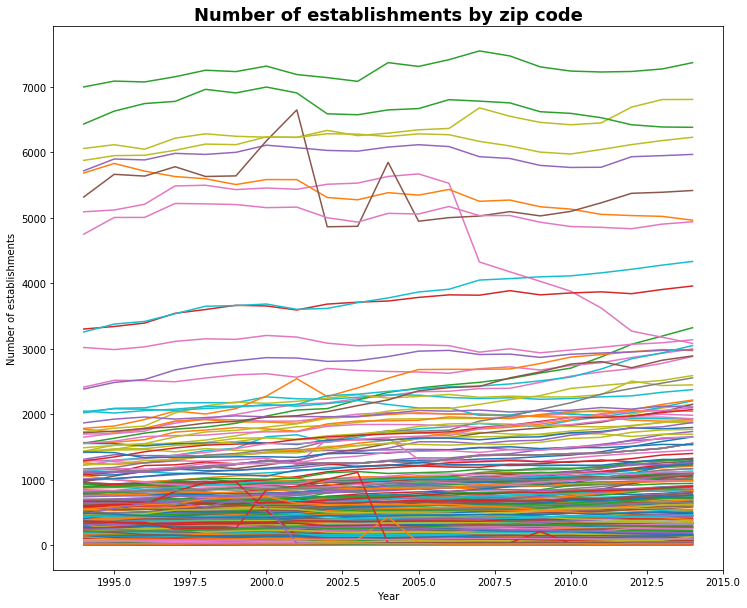

In [46]:
plt.figure(figsize=(12,10))
plt.plot(data.T);

plt.xlabel('Year')
plt.ylabel('Number of establishments')
plt.title('Number of establishments by zip code', fontsize = 18, fontweight = "bold")

### Fig 1: Time series for all zipcodes. This plot does not tells us much, but we make sure that the lines make sense.

# Now we want to normalize the data as requested, extracting the mean and deviding by the standard deviation

In [47]:
media=data.mean(axis=1)
desvio=data.std(axis=1)

In [48]:
df_norm=[]
df_norm=pd.DataFrame(df_norm)

for i in range (0,len(data)):
    df_norm=df_norm.append((data.iloc[i]-media.iloc[i])/desvio.iloc[i])

In [49]:
df_norm.head()

,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
0,-1.296083,-1.347340,-1.193568,-1.296083,-1.296083,-0.937280,-0.578478,-0.988538,0.087870,-0.117160,...,0.292900,0.190385,0.395415,0.702960,0.805475,1.113020,1.266793,0.959248,1.164278,1.676853
1,-1.433782,-1.305462,-1.186307,-0.975496,-0.792181,-0.819678,-0.783015,-0.636364,-0.150580,0.060232,...,-0.058923,0.023569,-0.058923,0.271044,0.536850,1.031799,1.022634,1.499252,1.765058,1.920875
2,-1.077974,-1.210216,-1.114040,-0.813490,-0.909666,-0.645182,-0.897644,-0.813490,-0.212389,-0.164301,...,-0.092169,-0.296543,-0.092169,0.088161,0.629152,1.254297,1.422605,1.518781,1.639001,1.891464
3,-1.223282,-1.159696,-1.149098,-0.915948,-0.852361,-0.926545,-0.841764,-0.788775,-0.184704,-0.089324,...,-0.057531,0.027251,0.186217,0.249804,0.493552,0.885668,1.065830,1.341371,1.871258,2.115007
4,-1.474935,-1.336988,-1.180649,-1.061095,-0.863371,-0.720826,-0.665648,-0.578281,-0.357567,-0.270200,...,0.120649,0.116050,0.327569,0.419533,0.695427,0.773596,0.998909,1.375964,1.753018,1.978331


# Now we make an elbow plot to see how many clusters is a "good" number of cluesters

In [50]:

def elbow(data,K):
#data is your input as numpy form
#K is a list of number of clusters you would like to show.
    # Run the KMeans model and save all the results for each number of clusters
    KM = [KMeans(n_clusters=k).fit(data) for k in K]
    
    # Save the centroids for each model with a increasing k
    centroids = [k.cluster_centers_ for k in KM]

    # For each k, get the distance between the data with each center. 
    D_k = [cdist(data, cent, 'euclidean') for cent in centroids]
    
    # But we only need the distance to the nearest centroid since we only calculate dist(x,ci) for its own cluster.
    globals()['dist'] = [np.min(D,axis=1) for D in D_k]
    
    # Calculate the Average SSE.
    avgWithinSS = [sum(d)/data.shape[0] for d in dist]
    
    
    # elbow curve
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(K, avgWithinSS, 'b*-')
    plt.grid(True)
    plt.xlabel('Number of clusters')
    plt.ylabel('Average within-cluster sum of squares')
    plt.title('Elbow for KMeans clustering')
    plt.show()
    
    
    # Total with-in sum of square plot. Another way to show the result.
    wcss = [sum(d**2) for d in dist]
    tss = sum(pdist(data)**2)/data.shape[0]
    bss = tss-wcss
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(K, bss/tss*100, 'b*-')
    plt.grid(True)
    plt.xlabel('Number of clusters')
    plt.ylabel('Percentage of variance explained')
    plt.title('Elbow for KMeans clustering')
    plt.show()


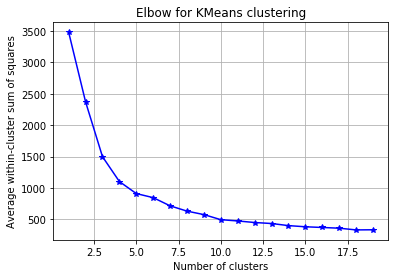

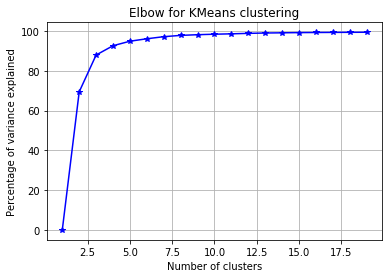

In [51]:
elbow(data,range(1,20))

### Fig 2: Elbow test to select optimal number of Clusters. From this plot we can say that the optimal number of clusters is probably between 2 and 5.

# Given the previous information we proceed to do K mean clustering for 2-5 clusters and plot how would the clusters look in a time series graph.

In [52]:
color_map={0:"red",1:"blue",2:"green",3:"orange",4:"pink"}

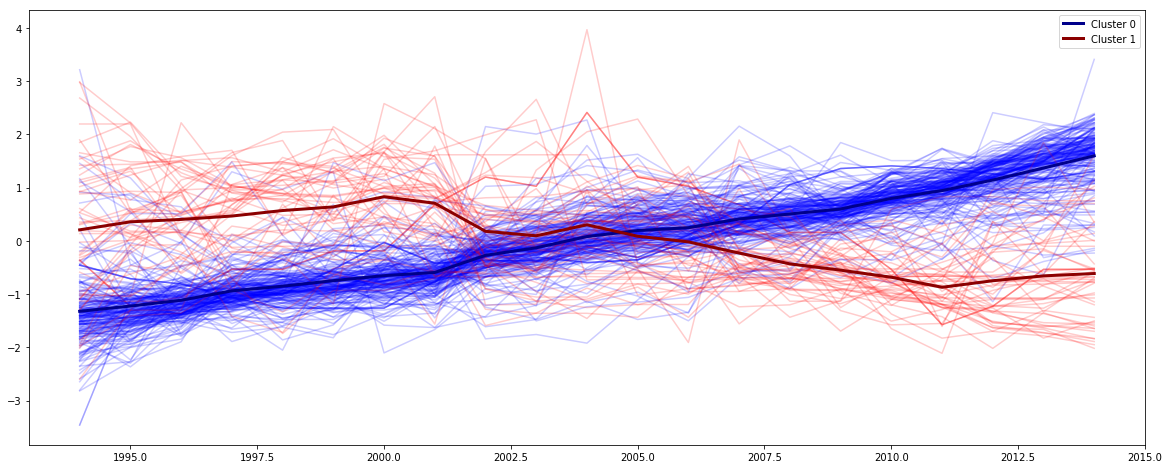

In [53]:
n=2 # number of clusters
dd=df_norm #data
#tar=y # real target

#train the model.
km=KMeans(random_state=324,n_clusters=n)
res=km.fit(dd)
#result.

df_norm["K_labels_2"]=res.labels_

plt.figure(figsize=(20,8))

for i in range (0,len(df_norm.iloc[:,0:21])):
    plt.plot(df_norm.iloc[i,0:21],color=df_norm["K_labels_2"].replace(color_map).iloc[i],alpha=0.2,label="")

plt.plot(df_norm.iloc[:,0:21][df_norm["K_labels_2"]==1].mean(axis=0),lw=3,label="Cluster 0",color="darkblue")
plt.plot(df_norm.iloc[:,0:21][df_norm["K_labels_2"]==0].mean(axis=0),lw=3,label="Cluster 1",color="darkred")
plt.legend()

### Fig 3: Time series with two K Means clusters

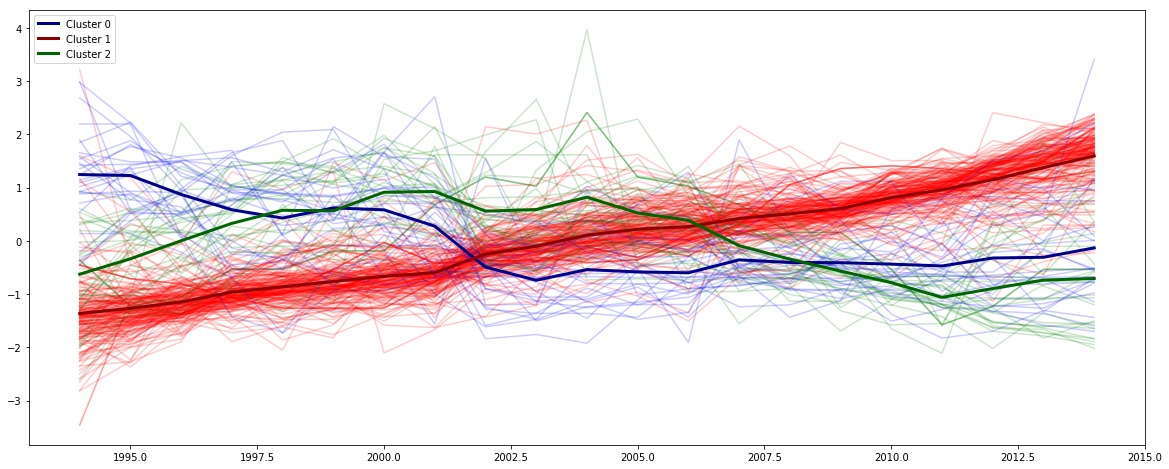

In [54]:
n=3 # number of clusters
dd=df_norm #data
#tar=y # real target

#train the model.
km=KMeans(random_state=324,n_clusters=n)
res=km.fit(dd)
#result.

df_norm["K_labels_3"]=res.labels_

plt.figure(figsize=(20,8))

for i in range (0,len(df_norm.iloc[:,0:21])):
    plt.plot(df_norm.iloc[i,0:21],color=df_norm["K_labels_3"].replace(color_map).iloc[i],alpha=0.2,label="")

plt.plot(df_norm.iloc[:,0:21][df_norm["K_labels_3"]==1].mean(axis=0),lw=3,label="Cluster 0",color="darkblue")
plt.plot(df_norm.iloc[:,0:21][df_norm["K_labels_3"]==0].mean(axis=0),lw=3,label="Cluster 1",color="darkred")
plt.plot(df_norm.iloc[:,0:21][df_norm["K_labels_3"]==2].mean(axis=0),lw=3,label="Cluster 2",color="darkgreen")
plt.legend()

### Fig 4: Time series with three K Means clusters

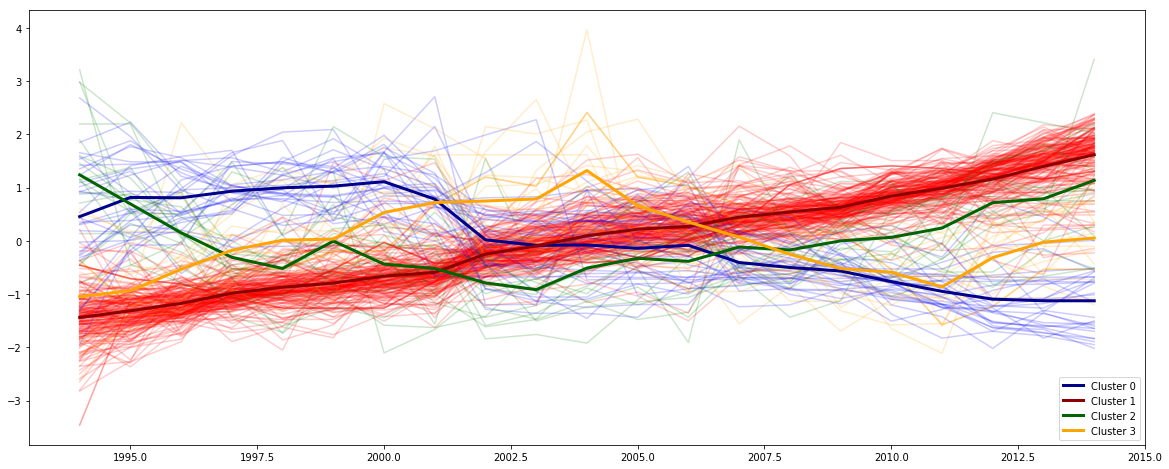

In [55]:
n=4 # number of clusters
dd=df_norm #data
#tar=y # real target

#train the model.
km=KMeans(random_state=324,n_clusters=n)
res=km.fit(dd)
#result.

df_norm["K_labels_4"]=res.labels_

plt.figure(figsize=(20,8))

for i in range (0,len(df_norm.iloc[:,0:21])):
    plt.plot(df_norm.iloc[i,0:21],color=df_norm["K_labels_4"].replace(color_map).iloc[i],alpha=0.2,label="")

plt.plot(df_norm.iloc[:,0:21][df_norm["K_labels_4"]==1].mean(axis=0),lw=3,label="Cluster 0",color="darkblue")
plt.plot(df_norm.iloc[:,0:21][df_norm["K_labels_4"]==0].mean(axis=0),lw=3,label="Cluster 1",color="darkred")
plt.plot(df_norm.iloc[:,0:21][df_norm["K_labels_4"]==2].mean(axis=0),lw=3,label="Cluster 2",color="darkgreen")
plt.plot(df_norm.iloc[:,0:21][df_norm["K_labels_4"]==3].mean(axis=0),lw=3,label="Cluster 3",color="orange")
plt.legend()

### Fig 5: Time series with four K Means clusters

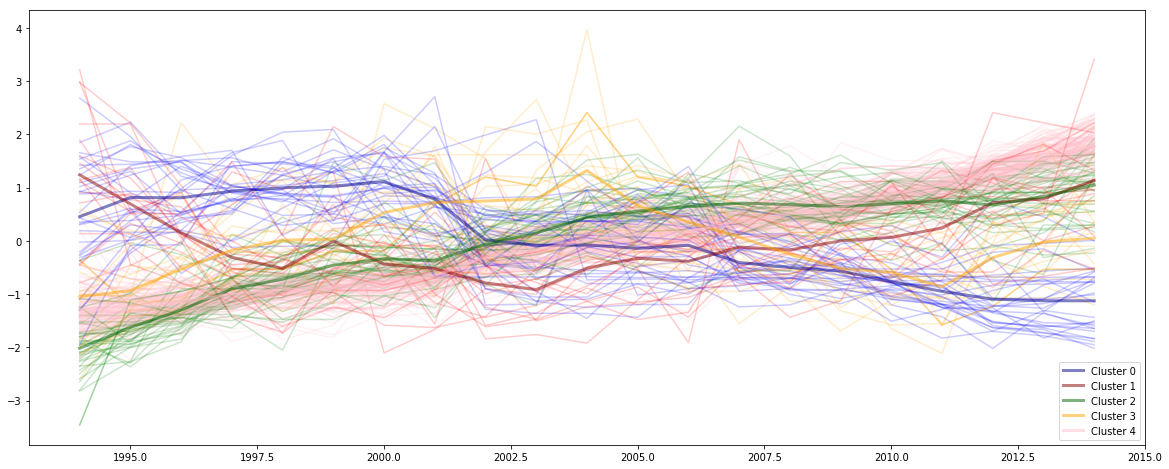

In [56]:
n=5 # number of clusters
dd=df_norm #data
#tar=y # real target

#train the model.
km=KMeans(random_state=324,n_clusters=n)
res=km.fit(dd)
#result.

df_norm["K_labels_5"]=res.labels_

plt.figure(figsize=(20,8))

for i in range (0,len(df_norm.iloc[:,0:21])):
    plt.plot(df_norm.iloc[i,0:21],color=df_norm["K_labels_5"].replace(color_map).iloc[i],alpha=0.2,label="")

plt.plot(df_norm.iloc[:,0:21][df_norm["K_labels_5"]==1].mean(axis=0),lw=3,label="Cluster 0",color="darkblue", alpha=0.5)
plt.plot(df_norm.iloc[:,0:21][df_norm["K_labels_5"]==0].mean(axis=0),lw=3,label="Cluster 1",color="darkred", alpha=0.5)
plt.plot(df_norm.iloc[:,0:21][df_norm["K_labels_5"]==2].mean(axis=0),lw=3,label="Cluster 2",color="darkgreen", alpha=0.5)
plt.plot(df_norm.iloc[:,0:21][df_norm["K_labels_5"]==3].mean(axis=0),lw=3,label="Cluster 3",color="orange", alpha=0.5)
plt.plot(df_norm.iloc[:,0:21][df_norm["K_labels_5"]==4].mean(axis=0),lw=3,label="Cluster 4",color="pink", alpha=0.5)
plt.legend()

### Fig 6: Time series with five K Means clusters

# Here we create a plot like Federica's in her guide notebook

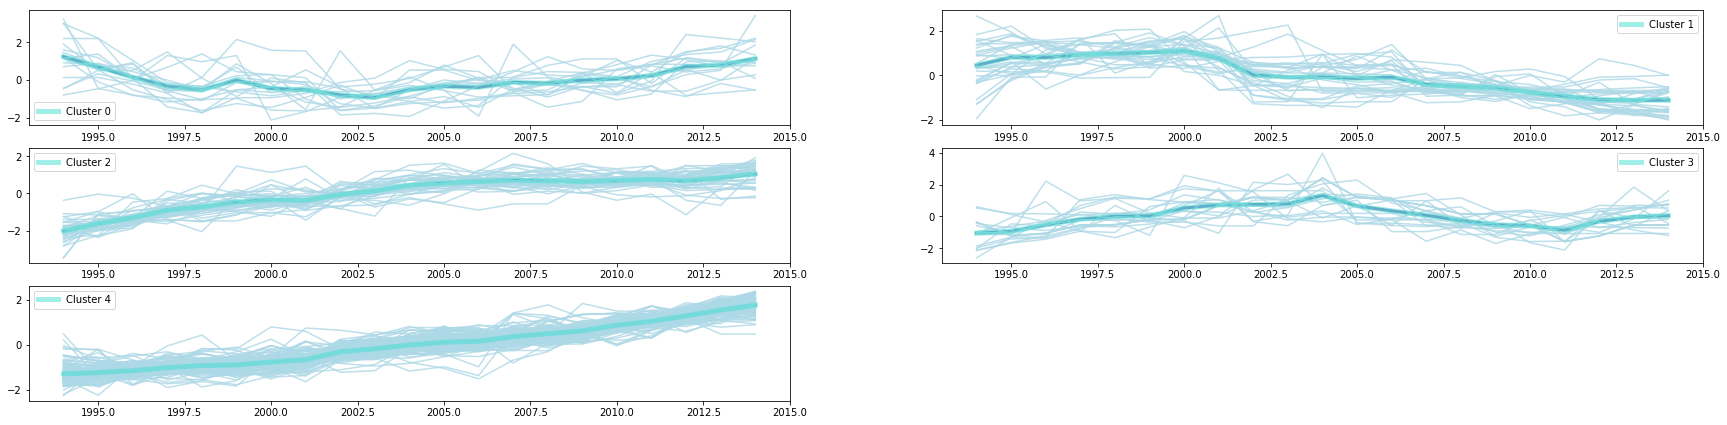

In [57]:
fig = plt.figure(figsize=(30,30))
for j in range(0,5):
    
    ax = fig.add_subplot(12,2,j+1)
    ax.plot(df_norm.iloc[:,0:21][df_norm["K_labels_5"]==j].mean(axis=0),lw=3,color="darkblue", alpha = 0.5)
    for i in range (0,len(df_norm[df_norm["K_labels_5"]==j].iloc[:,0:21])):
           ax.plot(df_norm[df_norm["K_labels_5"]==j].iloc[i,0:21],alpha=0.8,label="",color="lightblue")
    ax.plot(df_norm.iloc[:,0:21][df_norm["K_labels_5"]==j].mean(axis=0),lw=5,label="Cluster %d" % (j),color="turquoise", alpha=0.5)
    plt.legend()

### Fig 7. Plotting 5 clusters separately

# Now we add again the zipcode column to plot our clusters in a map after merging with the geocoded zip code shape file

In [58]:
df_norm["zipcode"] = df["ZIPCODE"]

In [59]:
df_norm.head()

,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,...,2010,2011,2012,2013,2014,K_labels_2,K_labels_3,K_labels_4,K_labels_5,zipcode
0,-1.296083,-1.347340,-1.193568,-1.296083,-1.296083,-0.937280,-0.578478,-0.988538,0.087870,-0.117160,...,1.113020,1.266793,0.959248,1.164278,1.676853,1,0,0,4,11436
1,-1.433782,-1.305462,-1.186307,-0.975496,-0.792181,-0.819678,-0.783015,-0.636364,-0.150580,0.060232,...,1.031799,1.022634,1.499252,1.765058,1.920875,1,0,0,4,11213
2,-1.077974,-1.210216,-1.114040,-0.813490,-0.909666,-0.645182,-0.897644,-0.813490,-0.212389,-0.164301,...,1.254297,1.422605,1.518781,1.639001,1.891464,1,0,0,4,11212
3,-1.223282,-1.159696,-1.149098,-0.915948,-0.852361,-0.926545,-0.841764,-0.788775,-0.184704,-0.089324,...,0.885668,1.065830,1.341371,1.871258,2.115007,1,0,0,4,11225
4,-1.474935,-1.336988,-1.180649,-1.061095,-0.863371,-0.720826,-0.665648,-0.578281,-0.357567,-0.270200,...,0.773596,0.998909,1.375964,1.753018,1.978331,1,0,0,4,11218


In [60]:
zipcodes.ZIPCODE = zipcodes.ZIPCODE.astype(int)

In [61]:
df = pd.merge(zipcodes, df_norm, right_on="zipcode", left_on="ZIPCODE")

# We plot for 5, 4, 3 and 2 clusters

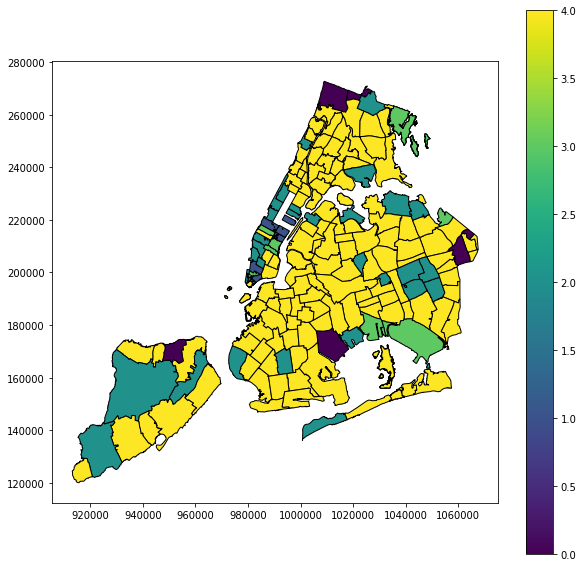

In [62]:
df.plot(figsize=(10,10),column='K_labels_5',cmap='viridis',edgecolor='black',legend=True)

### Fig 8. Here we can see, using K means how the zip codes cluster (when using 5), it appears that most of brooklyn, the bronk and queens, are clustered together.

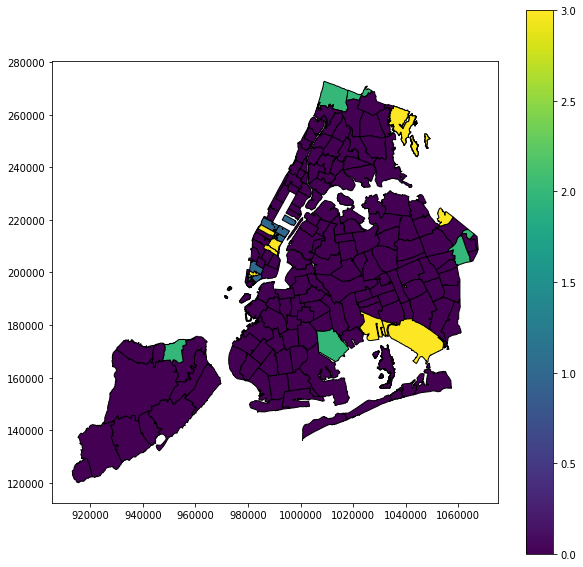

In [63]:
df.plot(figsize=(10,10),column='K_labels_4',cmap='viridis',edgecolor='black',legend=True)

### Fig 9. Here we can see, using K means how the zip codes cluster (when using 4), it appears that most of the zipcodes are clustered together, with the exception of some in midtown manhattan.

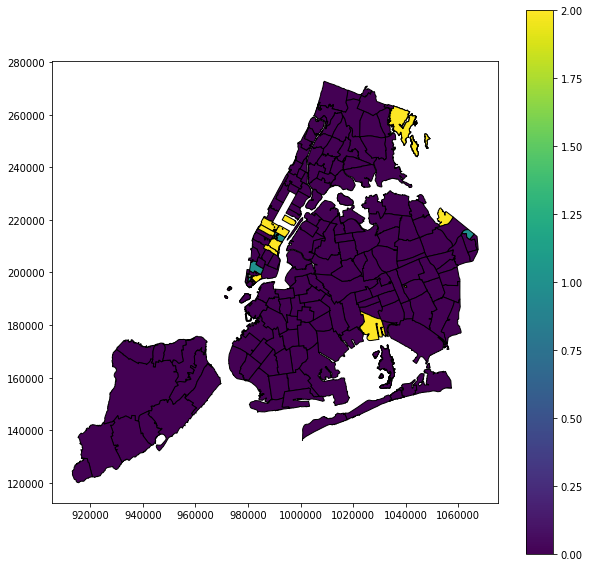

In [64]:
df.plot(figsize=(10,10),column='K_labels_3',cmap='viridis',edgecolor='black',legend=True)

### Fig 10. Here we can see, using K means how the zip codes cluster (when using 3), it appears that most of the zipcodes are clustered together, with the exception of some in midtown manhattan.

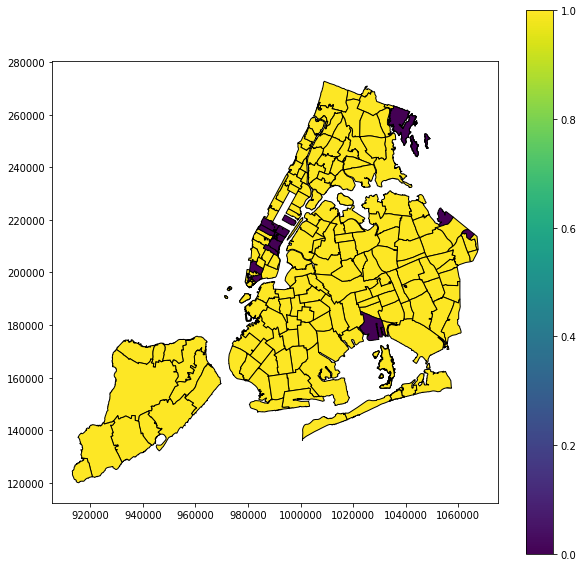

In [65]:
df.plot(figsize=(10,10),column='K_labels_2',cmap='viridis',edgecolor='black',legend=True)

### Fig 10. Here we can see, using K means how the zip codes cluster (when using 2), it appears that most of the zipcodes are clustered together, with the exception of some in midtown manhattan.


# Now we do it for another clustering technique, in this case, Gaussian Mixture. We will only do it for three clusters for result comparisson

## We run the necessary model fit

In [66]:
g3 = mixture.GMM(n_components=3)
g3.fit(data)

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class GMM is deprecated; The class GMM is deprecated in 0.18 and will be  removed in 0.20. Use class GaussianMixture instead.
  warnings.warn(msg, category=DeprecationWarning)
/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/opt/rh/anacond

GMM(covariance_type='diag', init_params='wmc', min_covar=0.001,
  n_components=3, n_init=1, n_iter=100, params='wmc', random_state=None,
  tol=0.001, verbose=0)

In [67]:
cluster_labels = g3.predict(data)

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)


In [68]:
data["3ClustersGaussian"] = cluster_labels

In [70]:
df = df.join(data["3ClustersGaussian"])

# We plot for the 3 clusters for the gaussian mixture

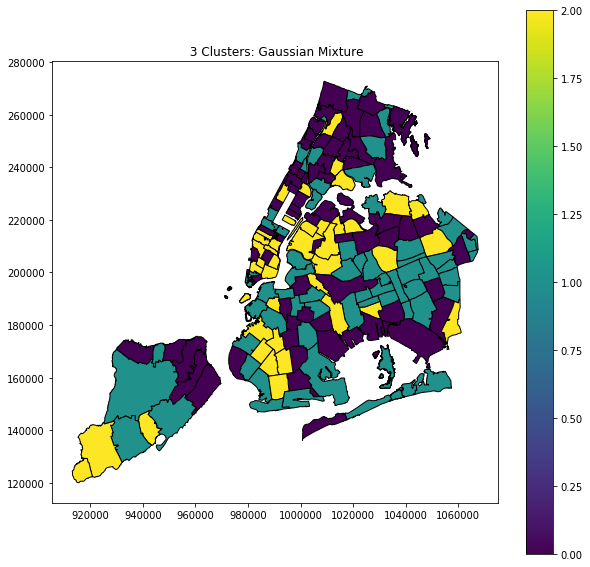

In [71]:
df.plot(figsize=(10,10),column='3ClustersGaussian',cmap='viridis',edgecolor='black',legend=True)
plt.title(" 3 Clusters: Gaussian Mixture")


### Fig 11. We can see how Gaussian Mixture generates different clusters to K means (DOING 3 Clusters).

# Results comparisson

From the different nature of K means and gaussian mixture we can understand why they generate different clusters. Nevertheless the reason to understand why they are assigning zip codes to a different cluster is difficult to see. Honestly whatever I write would be making up probable reasons.

## TASKS:
    
    1. get and prep your data.
    2. cluster the NUMBER OF ESTABLISHMENTS time series with K-means in **a few** clusters (as discussed there is no real good, sound way to decide what a good number is here. try a few options, keeping in mind a few is more than a couple, but i recommand you stay within the single digit numbers)
    3. plot the cluster centers (if you used K means those are the means of the clusters). you can plot for example the cluster centers overlayed on each time series (using the alpha channel to control the opacity in the plot may be helpful here).
    4. Use another clustering algorithm (of your choice)
    5. overlay your data on a NYC map: you can use shapefiles for the zip codes and different colors for different clusters
    6. Compare the results of the 2 algorithms
    7. attempt an interpretation. this is dangerous ground: clustering is an exploratory tool so you do not want to jump to conclusions because you see some clusters! but seeing structure in your data can inform your next moves as an investigator. 
    